# What Should I Drink?

### Goal

The goal of this project is to make a whiskey recommendation based on someone’s beer preferences.

### Why

We all have those friends (or customers) who can never decide what they want to drink. They spend hours looking at the drink list, at your favorite whiskey bar, trying to find a whiskey to try, but in the end, they fall back into their comfort zone and just order a Corona. Now instead of your friend wasting your time only to order a beer, they can be recommended a whiskey based on the beers they like. And if you are a server you no longer have to guess what the customer may or may not like based on some vague flavor profile that the customer thinks up in 5 seconds, you can just have them select a beer and like magic a whiskey will be recommended!

### Findings so Far

- There are a lot of different beer styles that have significant overlap (eg. Stout and Imperial Stout).
- There is no major scoring difference between users who leave a text review vs those who just leave a rating.
- Most of the reviews are positive
- Ngram analysis show that people are leaving descriptive reviews


In [1]:
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

import matplotlib.pyplot as plt

plt.style.use('default')
%matplotlib inline

In [2]:
df_beer = pd.read_csv('./Scraped_Data/df_beer.csv', encoding='latin1')
df_reviews1 = pd.read_csv('./Scraped_Data/1_aws_user_reviews.csv', names=['number', 'url', 'score', 'breakdown', 'username', 'r_text'])
df_reviews2 = pd.read_csv('./Scraped_Data/2_aws_user_reviews.csv', names=['number', 'url', 'score', 'breakdown', 'username', 'r_text'])

## EDA

In [3]:
# double check that there are no duplicate names
df_beer['name'].value_counts(ascending=True)

Union Jack IPA                          1
120 Minute IPA                          1
Sierra Nevada Porter                    1
Miles Davis' Bitches Brew               1
Abrasive Ale                            1
Double Trouble                          1
CBS (Canadian Breakfast Stout)          1
Alpha King                              1
Rübæus                                  1
Blind Pig IPA                           1
Bigfoot Barleywine-Style Ale            1
Curieux (Bourbon Barrel-Aged Tripel)    1
Duvel Belgian Golden Ale                1
Shock Top Belgian White                 1
Edmund Fitzgerald Porter                1
75 Minute IPA                           1
La Fin Du Monde                         1
Bourbon County Brand Stout              1
Orval Trappist Ale                      1
Racer 5 India Pale Ale                  1
Palate Wrecker                          1
Bourbon County Brand Barleywine Ale     1
AleSmith IPA                            1
§ucaba                            

In [4]:
# looking at style of beers
df_beer['style'].value_counts()

American IPA                        45
American Double / Imperial IPA      26
American Double / Imperial Stout    22
Russian Imperial Stout              13
American Pale Ale (APA)              8
American Porter                      7
Belgian Strong Dark Ale              7
Fruit / Vegetable Beer               6
Tripel                               6
American Strong Ale                  5
American Stout                       5
American Pale Wheat Ale              5
Saison / Farmhouse Ale               4
Belgian Strong Pale Ale              4
Milk / Sweet Stout                   4
Quadrupel (Quad)                     4
Witbier                              4
Hefeweizen                           4
American Adjunct Lager               4
Light Lager                          3
Belgian IPA                          3
American Wild Ale                    3
American Brown Ale                   3
Scotch Ale / Wee Heavy               3
American Amber / Red Ale             3
Irish Dry Stout          

In [5]:
print("IPA ", df_beer['style'].str.contains('IPA').value_counts()[1])
print("Porter ", df_beer['style'].str.contains('Porter').value_counts()[1])
print("Stout ", df_beer['style'].str.contains('Stout').value_counts()[1])
print("Lager ", df_beer['style'].str.contains('Lager').value_counts()[1])
print("Ale ", df_beer['style'].str.contains('Ale').value_counts()[1])

IPA  76
Porter  7
Stout  48
Lager  13
Ale  59


In [3]:
df_reviews1 = df_reviews1.drop('number', axis=1)
df_reviews2 = df_reviews2.drop('number', axis=1)

In [4]:
# stack the reviews into 1 df
df_reviews = df_reviews1.append(df_reviews2)

In [5]:
# everything that the scraper correctly scraped
df_useable = df_reviews[df_reviews['breakdown'].str.contains('look:') == True].copy()

In [6]:
# number of useable rows
df_reviews.shape[0] - df_useable.shape[0]

28951

In [7]:
df_has_review = df_useable[df_useable['r_text'].str.contains('No Review') == False].copy()

In [11]:
df_no_review = df_useable[df_useable['r_text'].str.contains('No Review') == True].copy()

In [12]:
# Do people who leave reviews tend to score better?
print('Has review average score', df_has_review['score'].mean(), '\nNo review average score', df_no_review['score'].mean())

Has review average score 4.240229877216896 
No review average score 4.239426436321901


In [13]:
# Possible number of reviews per beer
df_has_review.shape[0]/len(df_reviews['url'].unique())

318.69565217391306

### Ngrams

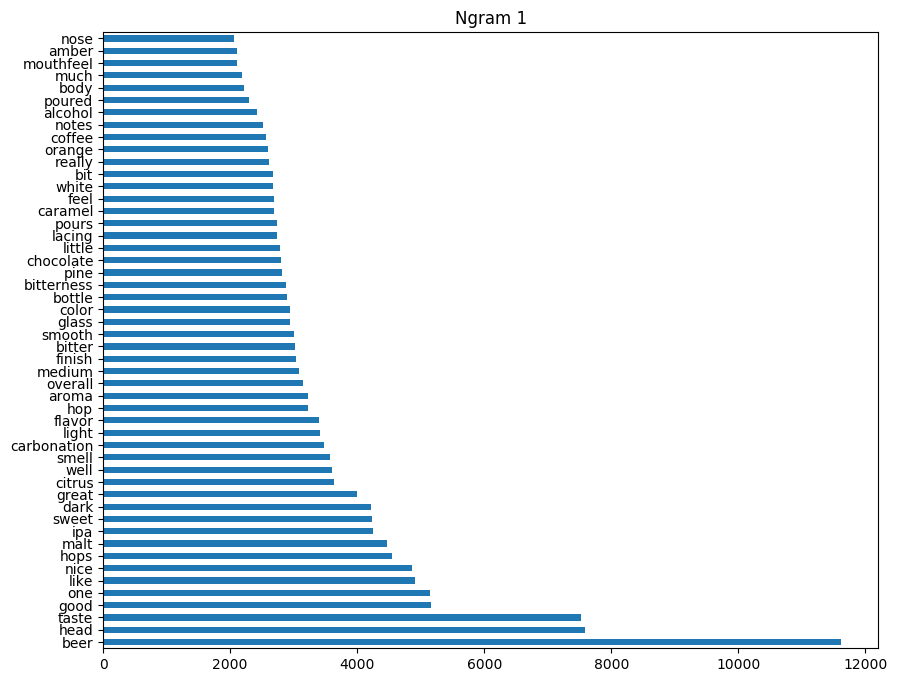

In [33]:
vect = CountVectorizer(ngram_range=(1,1), stop_words=stop)
X = vect.fit_transform(df_has_review['r_text'])

ngram_text = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())

plt.figure(figsize=(10,8))
ngram_text.sum().sort_values(ascending=False).head(50).plot(kind="barh", title='Ngram 1')

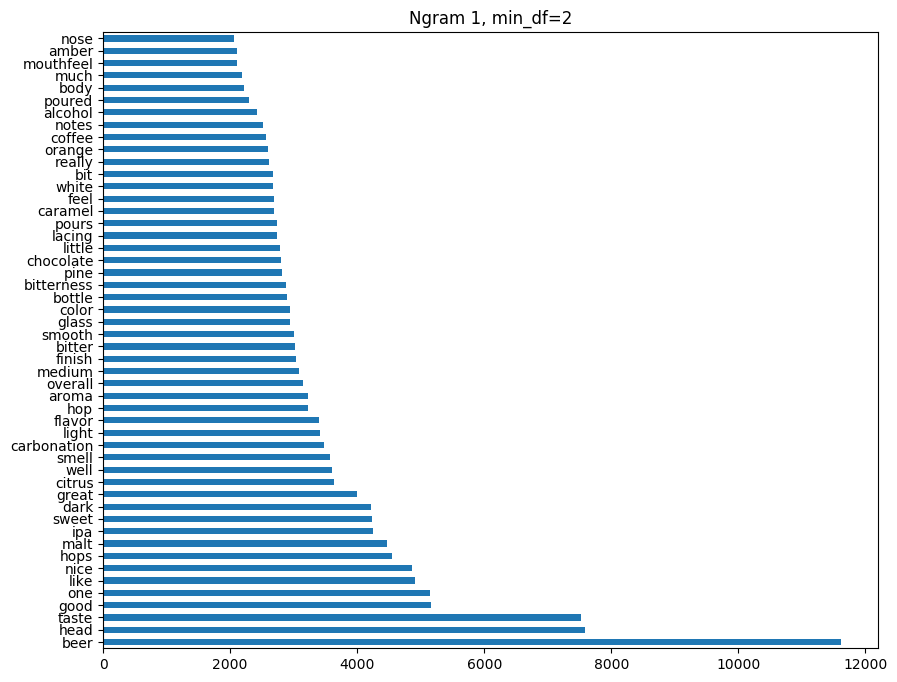

In [34]:
vect = CountVectorizer(ngram_range=(1,1), stop_words=stop, min_df=2)
X = vect.fit_transform(df_has_review['r_text'])

ngram_text = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())

plt.figure(figsize=(10,8))
ngram_text.sum().sort_values(ascending=False).head(50).plot(kind="barh", title='Ngram 1, min_df=2')

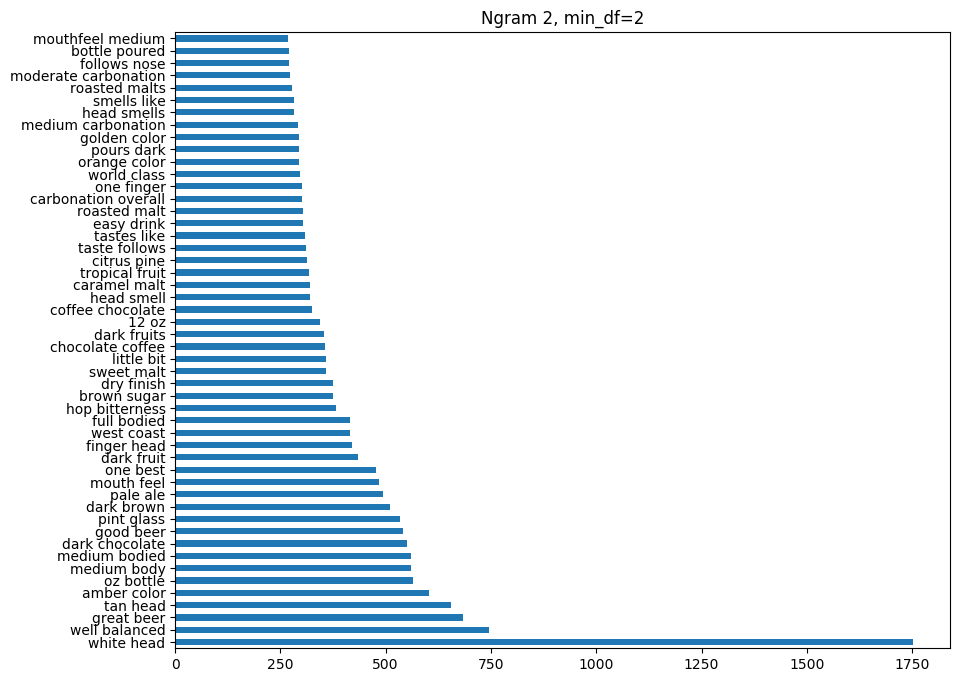

In [36]:
vect = CountVectorizer(ngram_range=(2,2), stop_words=stop, min_df=2)
X = vect.fit_transform(df_has_review['r_text'])

ngram_text = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())

plt.figure(figsize=(10,8))
ngram_text.sum().sort_values(ascending=False).head(50).plot(kind="barh", title='Ngram 2, min_df=2')

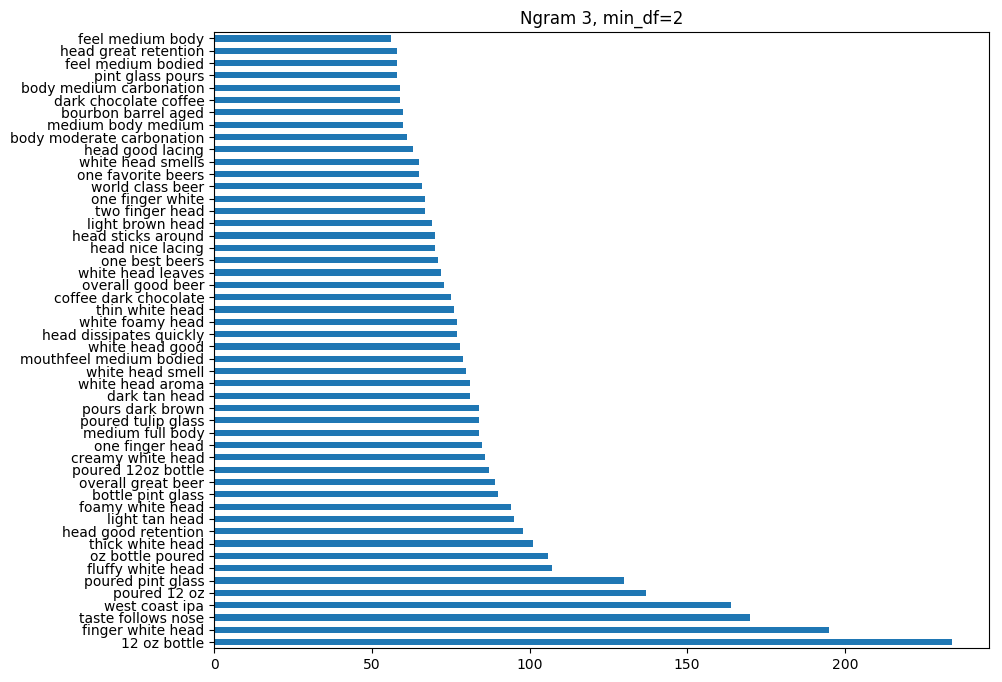

In [38]:
vect = CountVectorizer(ngram_range=(3,3), stop_words=stop, min_df=2)
X = vect.fit_transform(df_has_review['r_text'])

ngram_text = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())

plt.figure(figsize=(10,8))
ngram_text.sum().sort_values(ascending=False).head(50).plot(kind="barh", title='Ngram 3, min_df=2')

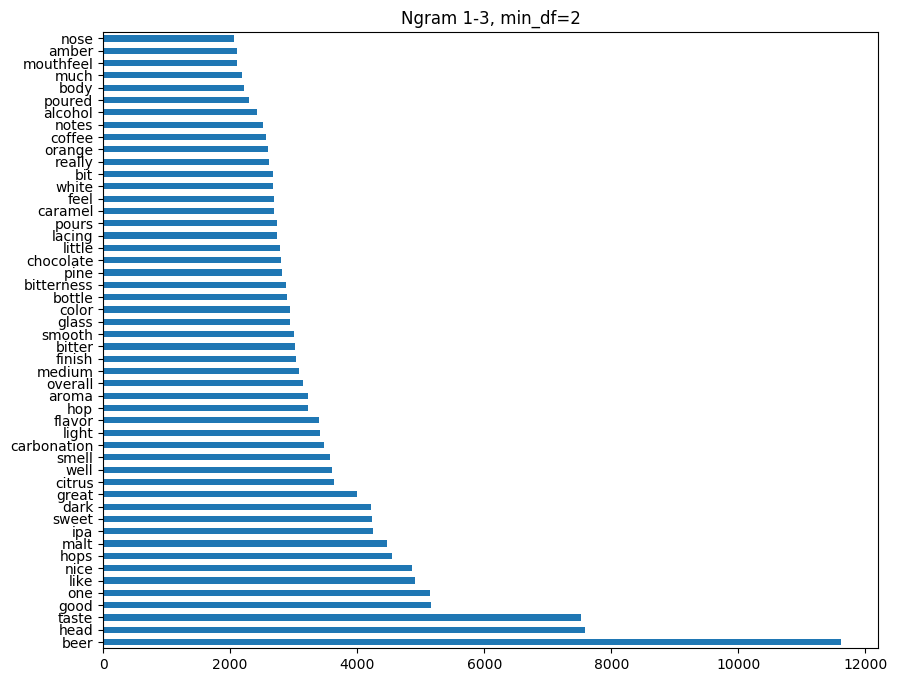

In [40]:
vect = CountVectorizer(ngram_range=(1,3), stop_words=stop, min_df=2)
X = vect.fit_transform(df_has_review['r_text'])

ngram_text = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())

plt.figure(figsize=(10,8))
ngram_text.sum().sort_values(ascending=False).head(50).plot(kind="barh", title='Ngram 1-3, min_df=2')

Scraping whiskey's reviewed within the past 3.5 year, have greater than an F, and clost less than $1000